In [197]:
import os
import torch
import random
import cv2 as cv
import numpy as np
import tensorflow as tf
from sklearn import metrics
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

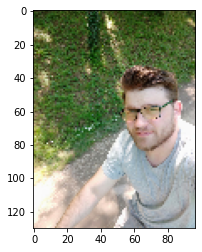

In [2]:
img = cv.cvtColor(cv.imread('Test1.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
img = cv.resize(img, None, fx = 0.1, fy = 0.1, interpolation = cv.INTER_CUBIC)

plt.imshow(img)
plt.show()

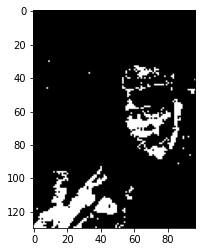

In [3]:
h_img = img.copy()
img_hls = cv.cvtColor(img, cv.COLOR_RGB2HLS)
img_h, img_l, img_s = cv.split(img_hls)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img_s[i, j] >= 50 and img_l[i, j] / img_s[i, j] > 0.5 and img_l[i, j] / img_s[i, j] < 3 and (img_h[i, j] <= 14 or 
            img_h[i, j] >= 165):
            
            if img[i, j, 0] >= 110 or (img[i, j, 0] < 110 and img[i, j, 1] >= 40 and img[i, j, 1] <= 110 and 
                img[i, j, 2] >= 40 and img[i, j, 2] <= 120 and img[i, j, 0] >= 40):
                h_img[i,j] = 255
            
            else:
                h_img[i,j] = 0
        
        else: 
            h_img[i,j] = 0

plt.imshow(h_img)
plt.show()

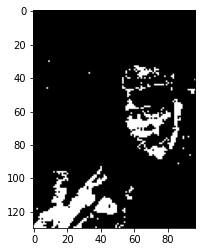

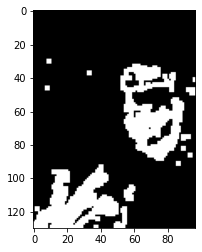

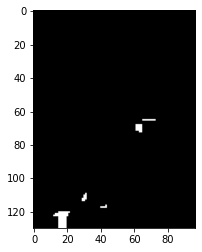

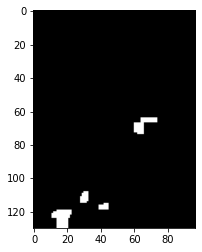

In [4]:
kernel = np.ones((3, 3), np.uint8)

dilation_1 = cv.dilate(h_img, kernel, iterations = 1)
erosion_2 = cv.erode(dilation_1, kernel, iterations = 4)
dilation_2 = cv.dilate(erosion_2, kernel, iterations = 1)

plt.imshow(h_img)
plt.show()
plt.imshow(dilation_1)
plt.show()
plt.imshow(erosion_2)
plt.show()
plt.imshow(dilation_2)
plt.show()

[77 72 33]


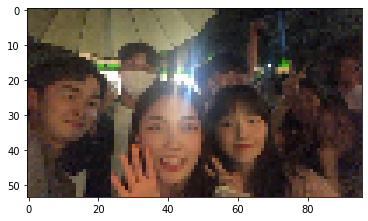

In [5]:
img = cv.cvtColor(cv.imread('Test5.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
img = cv.resize(img, None, fx = 0.1, fy = 0.1, interpolation = cv.INTER_CUBIC)
print(img[0, 0])

plt.imshow(img)
plt.show()

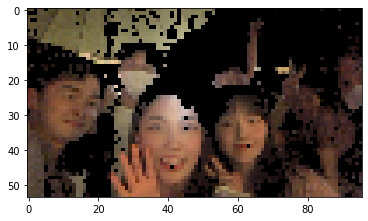

[101  93  57]


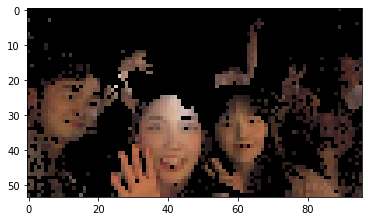

In [6]:
# borrowed from https://nalinc.github.io/blog/2018/skin-detection-python-opencv/

min_YCrCb = np.array([0, 133, 77], np.uint8)
max_YCrCb = np.array([235, 173, 127], np.uint8)

imageYCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)
skinRegionYCrCb = cv.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

skinYCrCb = cv.bitwise_and(img, img, mask = skinRegionYCrCb)

plt.imshow(skinYCrCb)
plt.show()
print(skinYCrCb[5, 15])

h_img = cv.cvtColor(skinYCrCb, cv.COLOR_RGB2HLS)
img_h, img_l, img_s = cv.split(h_img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img_s[i, j] >= 20 and img_l[i, j] / img_s[i, j] > 0.5 and img_l[i, j] / img_s[i, j] < 10 and (img_h[i, j] <= 14 or 
            img_h[i, j] >= 165):
            
            pass
        
        else: 
            skinYCrCb[i,j] = 0

plt.imshow(skinYCrCb)
plt.show()

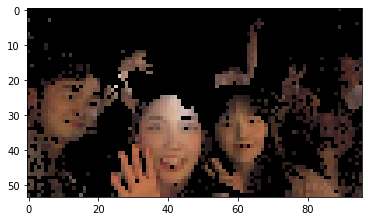

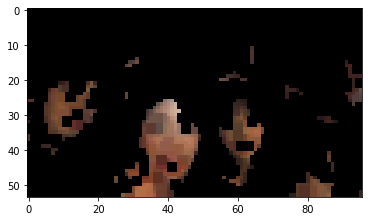

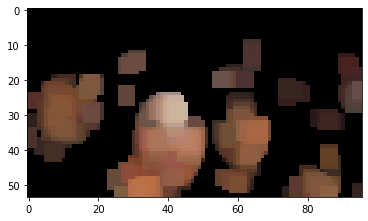

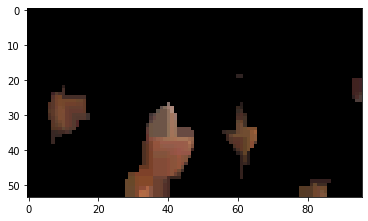

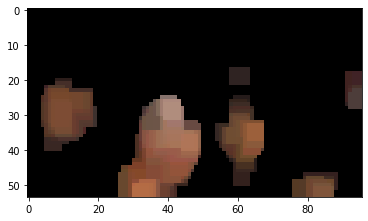

In [7]:
kernel = np.ones((3, 3), np.uint8)

erosion_1 = cv.erode(skinYCrCb, kernel, iterations = 1)
dilation_1 = cv.dilate(erosion_1, kernel, iterations = 2)
erosion_2 = cv.erode(dilation_1, kernel, iterations = 3)
dilation_2 = cv.dilate(erosion_2, kernel, iterations = 2)

plt.imshow(skinYCrCb)
plt.show()
plt.imshow(erosion_1)
plt.show()
plt.imshow(dilation_1)
plt.show()
plt.imshow(erosion_2)
plt.show()
plt.imshow(dilation_2)
plt.show()

In [8]:
print(img[37, 40])

[160 113  95]


In [9]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if ((img[i, j, 0] <= 200 and img[i, j, 1] <= 155 and img[i, j, 2] <= 150 and img[i, j, 1] >= 55 and 
            img[i, j, 2] >= 30) or (img[i, j, 0] > 200 and img[i, j, 1] > 115 and img[i, j, 2] > 60)) and \
            (img[i, j, 1] / 510 + img[i, j, 2] / 510 < 0.8) and skinYCrCb[i, j].sum() != 0:
            
            skinYCrCb[i,j] = 255
        
        else: 
            skinYCrCb[i,j] = 0

[208 194 185]


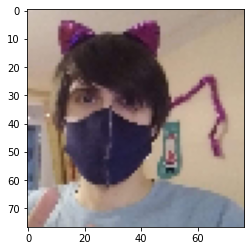

In [10]:
img = cv.cvtColor(cv.imread('Test.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
img = cv.resize(img, None, fx = 0.1, fy = 0.1, interpolation = cv.INTER_CUBIC)
print(img[0, 0])

plt.imshow(img)
plt.show()

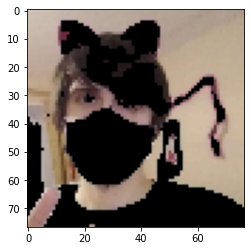

[0 0 0]


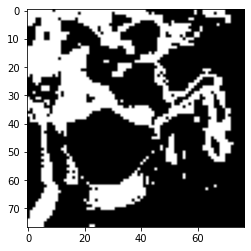

In [11]:
# borrowed from https://nalinc.github.io/blog/2018/skin-detection-python-opencv/

min_YCrCb = np.array([0, 133, 77], np.uint8)
max_YCrCb = np.array([235, 173, 127], np.uint8)

imageYCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)
skinRegionYCrCb = cv.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

skinYCrCb = cv.bitwise_and(img, img, mask = skinRegionYCrCb)

plt.imshow(skinYCrCb)
plt.show()
print(skinYCrCb[5, 15])

h_img = cv.cvtColor(skinYCrCb, cv.COLOR_RGB2HLS)
img_h, img_l, img_s = cv.split(h_img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img_s[i, j] >= 20 and img_l[i, j] / img_s[i, j] > 0.5 and img_l[i, j] / img_s[i, j] < 10 and (img_h[i, j] <= 14 or 
            img_h[i, j] >= 165):
            
            skinYCrCb[i,j] = 255
        
        else: 
            skinYCrCb[i,j] = 0

plt.imshow(skinYCrCb)
plt.show()

In [12]:
print(img[60, 20])

[200 184 169]


[117 122 125]


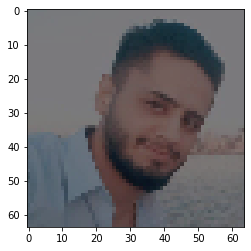

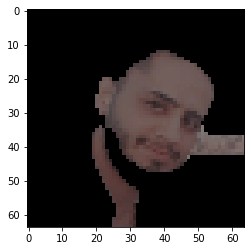

In [13]:
img = cv.cvtColor(cv.imread('Test0.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
img = cv.resize(img, None, fx = 0.1, fy = 0.1, interpolation = cv.INTER_CUBIC)

g_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

img[:, :, 0] = cv.multiply(img[:, :, 0], 0.5)
img[:, :, 1] = cv.multiply(img[:, :, 1], 0.5)
img[:, :, 2] = cv.multiply(img[:, :, 2], 0.5)
print(img[0, 0])

plt.imshow(img)
plt.show()

min_YCrCb = np.array([0, 133, 77], np.uint8)
max_YCrCb = np.array([235, 173, 127], np.uint8)

imageYCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)
skinRegionYCrCb = cv.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

skinRegionYCrCb = cv.medianBlur(skinRegionYCrCb, 5)

skinYCrCb = cv.bitwise_and(img, img, mask = skinRegionYCrCb)

plt.imshow(skinYCrCb)
plt.show()

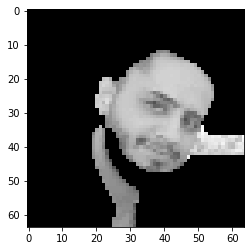

83


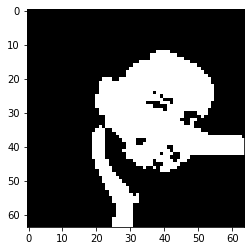

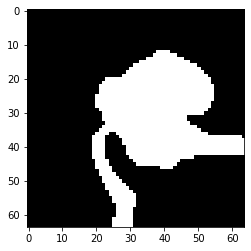

In [14]:
g_img = cv.cvtColor(skinYCrCb, cv.COLOR_RGB2GRAY)

plt.imshow(g_img, cmap = 'gray')
plt.show()

print(g_img[40, 20])

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (g_img[i, j] > 60 and g_img[i, j] <= 120) or (g_img[i, j] > 140 and g_img[i, j] <= 170) or \
            (g_img[i, j] > 200 and g_img[i, j] <= 230):
            
            g_img[i, j] = 255
        
        else: 
            g_img[i, j] = 0

plt.imshow(g_img, cmap = 'gray')
plt.show()

g_img = cv.medianBlur(g_img, 5)

plt.imshow(g_img, cmap = 'gray')
plt.show()

In [15]:
print(g_img[22, 44])

255


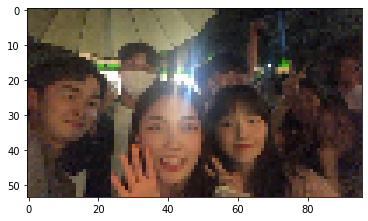

105


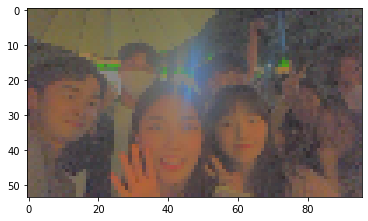

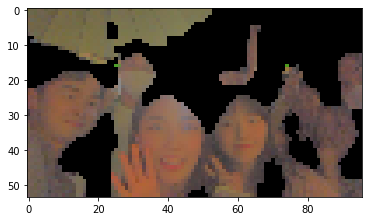

In [16]:
img = cv.cvtColor(cv.imread('Test5.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
img = cv.resize(img, None, fx = 0.1, fy = 0.1, interpolation = cv.INTER_CUBIC)
plt.imshow(img)
plt.show()

img = cv.cvtColor(img, cv.COLOR_RGB2YUV)
cft = cv.mean(img[:, :, 0])[0]

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i, j, 0] = 1 / (1 + ((255 - cft) / (img[i, j, 0] + 1)) ** 0.5) * 255

img = cv.cvtColor(img, cv.COLOR_YUV2RGB)

print(img[0, 0, 0])

plt.imshow(img)
plt.show()

min_YCrCb = np.array([0, 133, 77], np.uint8)
max_YCrCb = np.array([235, 173, 127], np.uint8)

imageYCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)
skinRegionYCrCb = cv.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

skinRegionYCrCb = cv.medianBlur(skinRegionYCrCb, 5)

skinYCrCb = cv.bitwise_and(img, img, mask = skinRegionYCrCb)

plt.imshow(skinYCrCb)
plt.show()

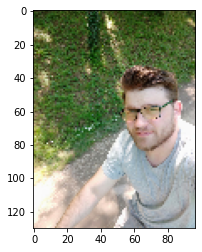

20


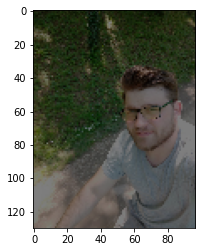

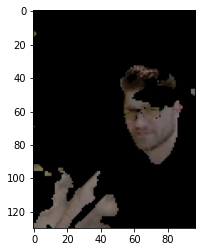

In [268]:
img = cv.cvtColor(cv.imread('Test1.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
img = cv.resize(img, None, fx = 0.1, fy = 0.1, interpolation = cv.INTER_CUBIC)
plt.imshow(img)
plt.show()

img[:, :, 0] = cv.multiply(img[:, :, 0], 0.5)
img[:, :, 1] = cv.multiply(img[:, :, 1], 0.5)
img[:, :, 2] = cv.multiply(img[:, :, 2], 0.5)

print(img[0, 0, 0])

plt.imshow(img)
plt.show()

min_YCrCb = np.array([0, 133, 77], np.uint8)
max_YCrCb = np.array([235, 173, 127], np.uint8)

imageYCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)
skinRegionYCrCb = cv.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

skinRegionYCrCb = cv.medianBlur(skinRegionYCrCb, 5)

skinYCrCb = cv.bitwise_and(img, img, mask = skinRegionYCrCb)

plt.imshow(skinYCrCb)
plt.show()

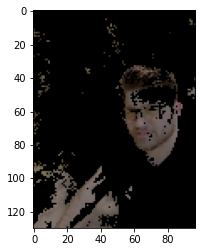

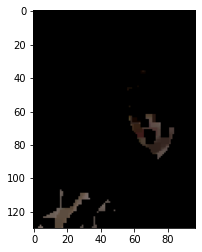

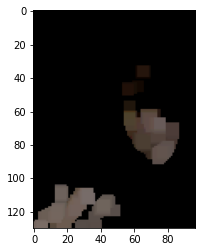

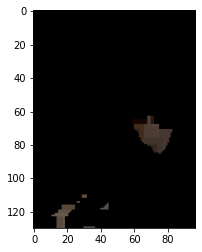

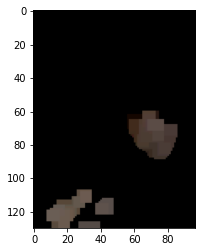

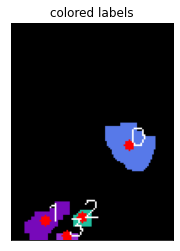

In [265]:
kernel = np.ones((3, 3), np.uint8)

erosion_1 = cv.erode(skinYCrCb, kernel, iterations = 2)
dilation_1 = cv.dilate(erosion_1, kernel, iterations = 3)
erosion_2 = cv.erode(dilation_1, kernel, iterations = 4)
dilation_2 = cv.dilate(erosion_2, kernel, iterations = 3)

plt.imshow(skinYCrCb)
plt.show()
plt.imshow(erosion_1)
plt.show()
plt.imshow(dilation_1)
plt.show()
plt.imshow(erosion_2)
plt.show()
plt.imshow(dilation_2)
plt.show()

def generate_colors(num):
    r = lambda: np.random.randint(0,255)
    return [(r(),r(),r()) for _ in range(num)]

dlt_2 = cv.cvtColor(dilation_2, cv.COLOR_RGB2GRAY)

connectivity = 8

n_labels, labels, stats, centroids = cv.connectedComponentsWithStats(dlt_2, connectivity, cv.CV_32S)

colors = generate_colors(n_labels)

labeled_image = np.zeros((dilation_2.shape[0], dilation_2.shape[1], 3), dtype = np.uint8)

for (i, label) in enumerate(range(1, n_labels)):
    labeled_image[labels == label, :] = colors[i]
    
    cent_x, cent_y = int(centroids[label, 0]), int(centroids[label, 1])
    cv.circle(labeled_image, (cent_x, cent_y), 3, (255, 0, 0), -1)
    cv.putText(labeled_image, str(i), (cent_x, cent_y), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.title('colored labels')
plt.xticks([]), plt.yticks([])
plt.imshow(labeled_image)
plt.show()

In [ ]:
connectivity=4
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(stomach_bw, connectivity, cv2.CV_32S)

print('Input image shape is {}'.format(stomach_bw.shape))
print('Labels type is {}'.format(type(labels)))
print('Labels shape is {}'.format(labels.shape))
print('Number of labels is {}'.format(n_labels))
print('Centroids coordinates \n {}'.format(centroids))
print('Statistics\n {}'.format(stats))

colors = generate_colors(n_labels)

labeled_image = np.zeros((stomach_bw.shape[0],stomach_bw.shape[1],3), dtype=np.uint8)

print('Connected components parameters:')
print('================================================')

# loop over all components and determine if it is a number
for (i, label) in enumerate(range(1, n_labels)):
    print(i)
    print(label)
    labeled_image[labels == label,:] = colors[i]
    # centroid coordinates
    cent_x, cent_y = int(centroids[label,0]), int(centroids[label,1])
    cv2.circle(labeled_image,(cent_x, cent_y), 3, (255,0,0), -1)
    cv2.putText(labeled_image, str(i), (cent_x, cent_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),1)
    
    print('labeled component {}'.format(i))
    print('leftmost coordinate {}'.format(stats[label, cv2.CC_STAT_LEFT]))
    print('top coordinate {}'.format(stats[label, cv2.CC_STAT_TOP ]))
    print('cc width {}'.format(stats[label, cv2.CC_STAT_WIDTH]))
    print('cc height {}'.format(stats[label, cv2.CC_STAT_HEIGHT ]))
    print('cc area {}'.format(stats[label, cv2.CC_STAT_AREA]))
    print('================================================')
    

plt.title('colored labels')
plt.xticks([]),plt.yticks([])
plt.imshow(labeled_image)
plt.show()

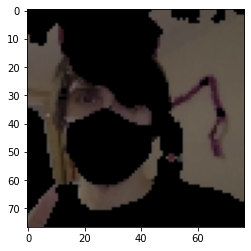

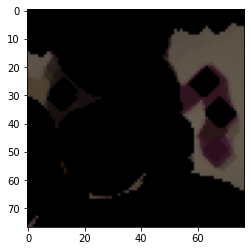

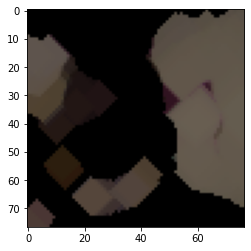

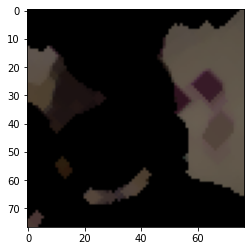

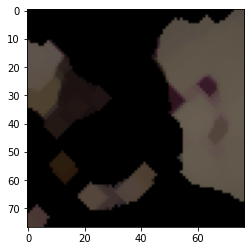

In [19]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

erosion_1 = cv.erode(skinYCrCb, kernel, iterations = 4)
dilation_1 = cv.dilate(erosion_1, kernel, iterations = 6)
erosion_2 = cv.erode(dilation_1, kernel, iterations = 4)
dilation_2 = cv.dilate(erosion_2, kernel, iterations = 2)

plt.imshow(skinYCrCb)
plt.show()
plt.imshow(erosion_1)
plt.show()
plt.imshow(dilation_1)
plt.show()
plt.imshow(erosion_2)
plt.show()
plt.imshow(dilation_2)
plt.show()

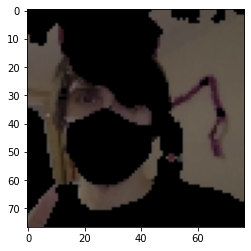

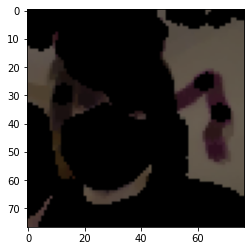

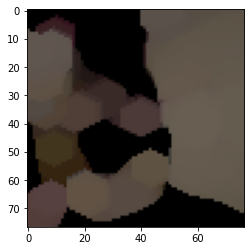

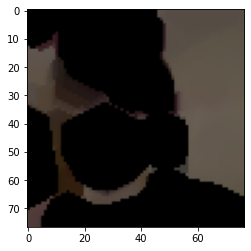

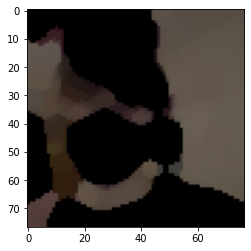

In [20]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

erosion_1 = cv.erode(skinYCrCb, kernel, iterations = 1)
dilation_1 = cv.dilate(erosion_1, kernel, iterations = 3)
erosion_2 = cv.erode(dilation_1, kernel, iterations = 3)
dilation_2 = cv.dilate(erosion_2, kernel, iterations = 1)

plt.imshow(skinYCrCb)
plt.show()
plt.imshow(erosion_1)
plt.show()
plt.imshow(dilation_1)
plt.show()
plt.imshow(erosion_2)
plt.show()
plt.imshow(dilation_2)
plt.show()

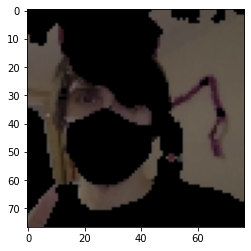

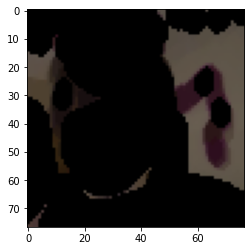

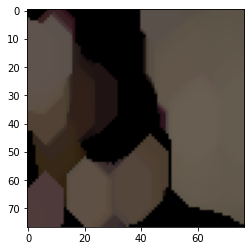

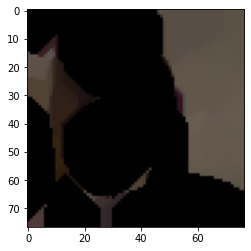

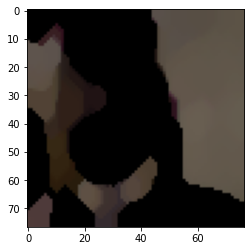

In [21]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 5))

erosion_1 = cv.erode(skinYCrCb, kernel, iterations = 2)
dilation_1 = cv.dilate(erosion_1, kernel, iterations = 6)
erosion_2 = cv.erode(dilation_1, kernel, iterations = 6)
dilation_2 = cv.dilate(erosion_2, kernel, iterations = 2)

plt.imshow(skinYCrCb)
plt.show()
plt.imshow(erosion_1)
plt.show()
plt.imshow(dilation_1)
plt.show()
plt.imshow(erosion_2)
plt.show()
plt.imshow(dilation_2)
plt.show()

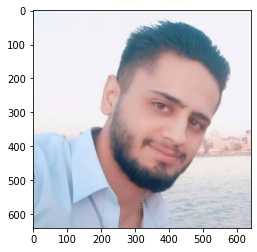

117


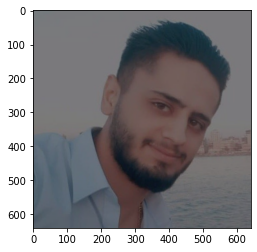

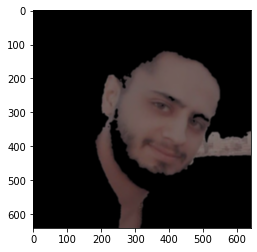

In [303]:
img = cv.cvtColor(cv.imread('Test0.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
f_img = img.copy()

plt.imshow(img)
plt.show()

img[:, :, 0] = cv.multiply(img[:, :, 0], 0.5)
img[:, :, 1] = cv.multiply(img[:, :, 1], 0.5)
img[:, :, 2] = cv.multiply(img[:, :, 2], 0.5)

print(img[0, 0, 0])

plt.imshow(img)
plt.show()

min_YCrCb1 = np.array([0, 133, 77], np.uint8)
max_YCrCb1 = np.array([235, 173, 127], np.uint8)

min_YCrCb2 = np.array([20, 129, 117], np.uint8)
max_YCrCb2 = np.array([40, 143, 127], np.uint8)

imageYCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)
skinRegionYCrCb1 = cv.inRange(imageYCrCb, min_YCrCb1, max_YCrCb1)
skinRegionYCrCb2 = cv.inRange(imageYCrCb, min_YCrCb2, max_YCrCb2)

skinRegionYCrCb1 = cv.medianBlur(skinRegionYCrCb1, 5)
skinRegionYCrCb2 = cv.medianBlur(skinRegionYCrCb2, 5)

skinRegionYCrCb = skinRegionYCrCb1 + skinRegionYCrCb2
skinYCrCb = cv.bitwise_and(img, img, mask = skinRegionYCrCb)
skinYCrCb = cv.blur(skinYCrCb, (5, 5))

plt.imshow(skinYCrCb)
plt.show()

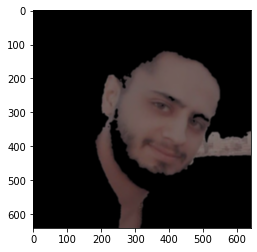

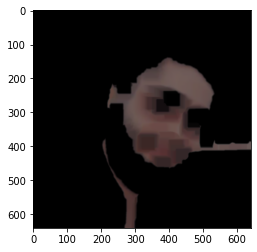

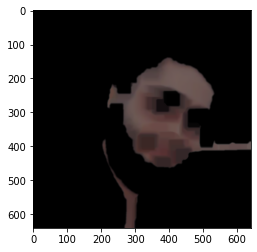

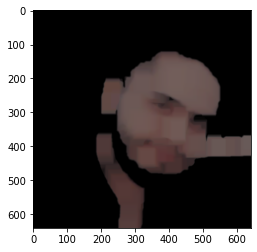

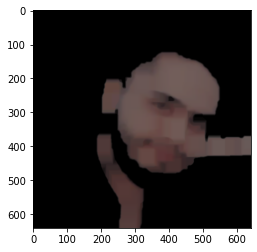

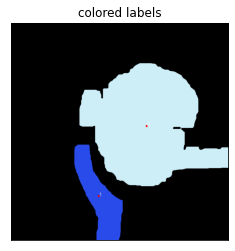

In [304]:
kernel = np.ones((5, 5), np.uint8)

erosion_1 = cv.erode(skinYCrCb, kernel, iterations = 8)
erosion = cv.medianBlur(erosion_1, 5)
dilation_1 = cv.dilate(erosion, kernel, iterations = 9)
erosion_2 = cv.erode(dilation_1, kernel, iterations = 1)
dilation_2 = erosion_2

plt.imshow(skinYCrCb)
plt.show()
plt.imshow(erosion_1)
plt.show()
plt.imshow(erosion)
plt.show()
plt.imshow(dilation_1)
plt.show()
plt.imshow(dilation_2)
plt.show()

def generate_colors(num):
    r = lambda: np.random.randint(0,255)
    return [(r(),r(),r()) for _ in range(num)]

dlt_2 = cv.cvtColor(dilation_2, cv.COLOR_RGB2GRAY)

connectivity = 8

n_labels, labels, stats, centroids = cv.connectedComponentsWithStats(dlt_2, connectivity, cv.CV_32S)

colors = generate_colors(n_labels)

labeled_image = np.zeros((dilation_2.shape[0], dilation_2.shape[1], 3), dtype = np.uint8)

for (i, label) in enumerate(range(1, n_labels)):
    labeled_image[labels == label, :] = colors[i]
    
    cent_x, cent_y = int(centroids[label, 0]), int(centroids[label, 1])
    cv.circle(labeled_image, (cent_x, cent_y), 3, (255, 0, 0), -1)
    cv.putText(labeled_image, str(i), (cent_x, cent_y), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.title('colored labels')
plt.xticks([]), plt.yticks([])
plt.imshow(labeled_image)
plt.show()

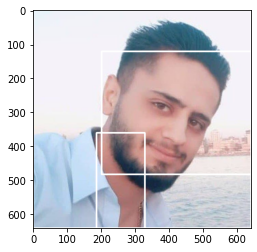

In [302]:
for i in range(label + 1):
    x = int(stats[i, cv.CC_STAT_TOP] * f_img.shape[0] / img.shape[0])
    y = int(stats[i, cv.CC_STAT_LEFT] * f_img.shape[1] / img.shape[1])
    h = int(stats[i, cv.CC_STAT_HEIGHT] * f_img.shape[0] / img.shape[0])
    w = int(stats[i, cv.CC_STAT_WIDTH] * f_img.shape[1] / img.shape[1])
    
    cv.rectangle(f_img, (y, x), (y + w, x + h), color = (255, 255, 255), thickness = 3)

plt.imshow(f_img)
plt.show()

In [4]:
face = []
n_fc = []

for i in os.listdir('face detection/face'):
    face.append([cv.cvtColor(cv.imread('face detection/face/{}'.format(i), cv.IMREAD_COLOR), cv.COLOR_BGR2RGB), 1])

for i in os.listdir('face detection/non-face'):
    n_fc.append([cv.cvtColor(cv.imread('face detection/non-face/{}'.format(i), cv.IMREAD_COLOR), cv.COLOR_BGR2RGB), 0])

face = np.array(face)
n_fc = np.array(n_fc)

f_trn, f_tst = train_test_split(face, test_size = 0.2)
n_trn, n_tst = train_test_split(n_fc, test_size = 0.2)

train = []
test = []

for i in range(len(f_trn)):
    train.append(f_trn[i])
    train.append(n_trn[i])

for i in range(len(f_tst)):
    test.append(f_tst[i])
    test.append(n_tst[i])

random.shuffle(train)
random.shuffle(test)

train = np.array(train)
test = np.array(test)

trn_d = []
tst_d = []

trn_l = np.zeros(len(train))
tst_l = np.zeros(len(test))

for i in range(len(train)):
    trn_l[i] = train[i, 1]
    trn_d.append(train[i, 0])

for i in range(len(test)):
    tst_l[i] = test[i, 1]
    tst_d.append(test[i, 0])

trn_d = np.array(trn_d)
tst_d = np.array(tst_d)

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [5]:
dtct_mdl = Sequential()

dtct_mdl.add(Conv2D(64, 3, activation = 'relu', input_shape = (48, 48, 3), padding = "same"))
dtct_mdl.add(MaxPooling2D(2, 2))

dtct_mdl.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
dtct_mdl.add(MaxPooling2D(2, 2))

dtct_mdl.add(Conv2D(256, 3, activation = 'relu', padding = "same"))

dtct_mdl.add(Flatten())
dtct_mdl.add(Dense(1, activation = 'sigmoid'))

dtct_mdl.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [6]:
dtct_mdl.fit(trn_d, trn_l, epochs = 15, batch_size = 20)

Train on 320 samples
Epoch 1/15
320/320 [==============================] - 7s 23ms/sample - loss: 18.6733 - accuracy: 0.5719
Epoch 2/15
320/320 [==============================] - 5s 17ms/sample - loss: 0.3475 - accuracy: 0.8313
Epoch 3/15
320/320 [==============================] - 7s 23ms/sample - loss: 0.1618 - accuracy: 0.9375
Epoch 4/15
320/320 [==============================] - 5s 17ms/sample - loss: 0.0899 - accuracy: 0.9719
Epoch 5/15
320/320 [==============================] - 5s 17ms/sample - loss: 0.1731 - accuracy: 0.9469
Epoch 6/15
320/320 [==============================] - 5s 17ms/sample - loss: 0.0833 - accuracy: 0.9688
Epoch 7/15
320/320 [==============================] - 5s 17ms/sample - loss: 0.0455 - accuracy: 0.9937
Epoch 8/15
320/320 [==============================] - 5s 17ms/sample - loss: 0.0229 - accuracy: 0.9969
Epoch 9/15
320/320 [==============================] - 5s 17ms/sample - loss: 0.0121 - accuracy: 1.0000
Epoch 10/15
320/320 [==============================

In [7]:
res = dtct_mdl.predict(tst_d)
ttl = 0

for i in range(len(tst_l)):
    if res[i] > 0.5 and tst_l[i] == 1:
        ttl += 1
    
    if res[i] <= 0.5 and tst_l[i] == 0:
        ttl += 1

print('Precision: ' + str(ttl / len(tst_l)))

Precision: 0.9625


In [305]:
chck_set = []

for i in range(label):
    x = int(stats[i + 1, cv.CC_STAT_TOP] * f_img.shape[0] / img.shape[0])
    y = int(stats[i + 1, cv.CC_STAT_LEFT] * f_img.shape[1] / img.shape[1])
    h = int(stats[i + 1, cv.CC_STAT_HEIGHT] * f_img.shape[0] / img.shape[0])
    w = int(stats[i + 1, cv.CC_STAT_WIDTH] * f_img.shape[1] / img.shape[1])
    
    chck_set.append(cv.resize(f_img[x : x + h, y : y + w], (48, 48), interpolation = cv.INTER_CUBIC))

chck_set = np.array(chck_set)

In [306]:
res = dtct_mdl.predict(chck_set)
print(res)

[[0.2595168]
 [0.5188783]]


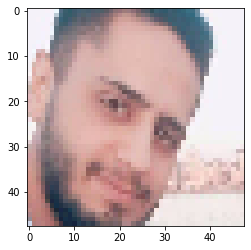

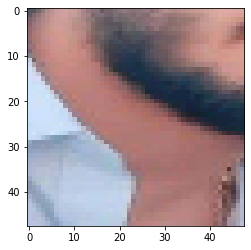

In [307]:
for i in chck_set:
    plt.imshow(i)
    plt.show()

In [229]:
data = []
path = 'face detection/emotion/'
func = np.array

for i, j, k, l, m, n, o in zip(os.listdir(path + 'angry'), os.listdir(path + 'disgust'), os.listdir(path + 'fear'), 
    os.listdir(path + 'happy'), os.listdir(path + 'neutral'), os.listdir(path + 'sad'), os.listdir(path + 'surprise')):
    data.append([cv.imread('face detection/emotion/angry/{}'.format(i), cv.IMREAD_COLOR), func([1, 0, 0, 0, 0, 0, 0])])
    data.append([cv.imread('face detection/emotion/disgust/{}'.format(j), cv.IMREAD_COLOR), func([0, 1, 0, 0, 0, 0, 0])])
    data.append([cv.imread('face detection/emotion/fear/{}'.format(k), cv.IMREAD_COLOR), func([0, 0, 1, 0, 0, 0, 0])])
    data.append([cv.imread('face detection/emotion/happy/{}'.format(l), cv.IMREAD_COLOR), func([0, 0, 0, 1, 0, 0, 0])])
    data.append([cv.imread('face detection/emotion/neutral/{}'.format(m), cv.IMREAD_COLOR), func([0, 0, 0, 0, 1, 0, 0])])
    data.append([cv.imread('face detection/emotion/sad/{}'.format(n), cv.IMREAD_COLOR), func([0, 0, 0, 0, 0, 1, 0])])
    data.append([cv.imread('face detection/emotion/surprise/{}'.format(o), cv.IMREAD_COLOR), func([0, 0, 0, 0, 0, 0, 1])])

random.shuffle(data)
data = np.array(data)
trn, tst = train_test_split(data, test_size = 0.2)

tr_dt = []
ts_dt = []

tr_lb = []
ts_lb = []

for i in range(len(trn)):
    tr_dt.append(trn[i, 0])
    tr_lb.append(trn[i, 1])

for i in range(len(tst)):
    ts_dt.append(tst[i, 0])
    ts_lb.append(tst[i, 1])

tr_dt = np.array(tr_dt)
ts_dt = np.array(ts_dt)
tr_lb = np.array(tr_lb)
ts_lb = np.array(ts_lb)

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [230]:
anlz_mdl = Sequential()

anlz_mdl.add(Conv2D(16, 3, activation = 'relu', input_shape = (48, 48, 3), padding = "same"))
anlz_mdl.add(MaxPooling2D(2, 2))

anlz_mdl.add(Conv2D(32, 3, activation = 'relu', padding = "same"))
anlz_mdl.add(MaxPooling2D(2, 2))

anlz_mdl.add(Conv2D(64, 3, activation = 'relu', padding = "same"))
anlz_mdl.add(MaxPooling2D(2, 2))

anlz_mdl.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
anlz_mdl.add(Conv2D(256, 3, activation = 'relu', padding = "same"))

anlz_mdl.add(Flatten())
anlz_mdl.add(Dense(500, activation = 'relu'))
anlz_mdl.add(Dense(7, activation = 'softmax'))

anlz_mdl.compile(loss = 'categorical_crossentropy', optimizer = 'Adagrad', metrics = ['CategoricalAccuracy'])

In [231]:
anlz_mdl.fit(tr_dt, tr_lb, epochs = 15, batch_size = 56, validation_data = (ts_dt, ts_lb))

Train on 1456 samples, validate on 364 samples
Epoch 1/15
  56/1456 [>.............................] - ETA: 40s

InvalidArgumentError:  Received a label value of 6 which is outside the valid range of [0, 1).  Label values: 2 0 1 1 1 4 1 0 5 3 4 2 0 4 5 5 2 6 3 2 4 6 1 0 5 5 1 2 2 2 2 2 0 0 5 0 5 4 4 6 4 4 0 6 2 1 6 0 3 0 6 4 1 4 4 5
	 [[node loss/dense_50_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at \AppData\Local\Temp/ipykernel_38068/1870951413.py:1) ]] [Op:__inference_distributed_function_75126]

Function call stack:
distributed_function


Precision: 0.3436988543371522


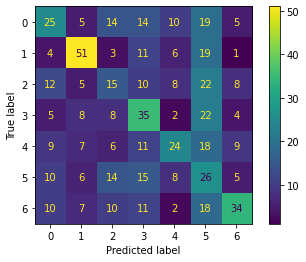

In [206]:
rst = anlz_mdl.predict(ts_dt)
ttl = 0

for i in range(len(ts_lb)):
    if np.argmax(rst[i]) == np.argmax(ts_lb[i]):
        ttl += 1

print('Precision: ' + str(ttl / len(ts_lb)))

matrix = metrics.confusion_matrix(np.argmax(ts_lb, axis = 1), np.argmax(rst, axis = 1))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = list(set(np.argmax(ts_lb, axis = 1))))
disp.plot()
plt.show()

In [72]:
np.argmax(tr_lb, axis = 1)

array([6, 5, 4, ..., 4, 5, 2], dtype=int64)

In [80]:
for i in range(len(chck_set)):
    chck_set[i] = cv.cvtColor(cv.cvtColor(chck_set[i], cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

rst = anlz_mdl.predict(chck_set)
print(np.argmax(rst, axis = 1))

[5 5 2 5]


In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.array([[9, 0], [1, 2]])
print(trn[i, 0].shape)
arr = np.array([a, b])
arr = np.append(arr, [c], axis = 0)
arr.shape

In [182]:
data = []
path = 'face detection/emotion/'
func = np.array

for i, j, k, l, m, n, o in zip(os.listdir(path + 'angry'), os.listdir(path + 'disgust'), os.listdir(path + 'fear'), 
    os.listdir(path + 'happy'), os.listdir(path + 'neutral'), os.listdir(path + 'sad'), os.listdir(path + 'surprise')):
    data.append([cv.imread('face detection/emotion/angry/{}'.format(i), cv.IMREAD_COLOR), func([1, 0, 0, 0, 0, 0, 0])])
    #data.append([cv.imread('face detection/emotion/disgust/{}'.format(j), cv.IMREAD_COLOR), func([0, 1, 0, 0, 0, 0, 0])])
    data.append([cv.imread('face detection/emotion/fear/{}'.format(k), cv.IMREAD_COLOR), func([0, 0, 1, 0, 0, 0, 0])])
    data.append([cv.imread('face detection/emotion/happy/{}'.format(l), cv.IMREAD_COLOR), func([0, 0, 0, 1, 0, 0, 0])])
    #data.append([cv.imread('face detection/emotion/neutral/{}'.format(m), cv.IMREAD_COLOR), func([0, 0, 0, 0, 1, 0, 0])])
    data.append([cv.imread('face detection/emotion/sad/{}'.format(n), cv.IMREAD_COLOR), func([0, 0, 0, 0, 0, 1, 0])])
    #data.append([cv.imread('face detection/emotion/surprise/{}'.format(o), cv.IMREAD_COLOR), func([0, 0, 0, 0, 0, 0, 1])])

random.shuffle(data)
data = np.array(data)

ts_dt = []
ts_lb = []

for i in range(len(data)):
    ts_dt.append(data[i, 0])
    ts_lb.append(data[i, 1])

dt = np.array(ts_dt, float)
lb = np.array(ts_lb)

for i in range(len(dt)):
    cv.normalize(dt[i], dt[i], norm_type = cv.NORM_MINMAX)

C:\Users\72684\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


Precision: 0.39285714285714285


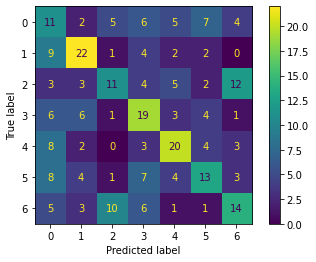

In [104]:
rst = anlz_mdl.predict(ts_dt)
ttl = 0

for i in range(len(ts_lb)):
    if np.argmax(rst[i]) == np.argmax(ts_lb[i]):
        ttl += 1

print('Precision: ' + str(ttl / len(ts_lb)))

matrix = metrics.confusion_matrix(np.argmax(ts_lb, axis = 1), np.argmax(rst, axis = 1))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = list(set(np.argmax(ts_lb, axis = 1))))
disp.plot()
plt.show()

In [222]:
print(tr_dt[0])

[[[ 45  45  45]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [149 149 149]
  [110 110 110]
  [115 115 115]]

 [[ 51  51  51]
  [ 47  47  47]
  [ 50  50  50]
  ...
  [150 150 150]
  [138 138 138]
  [105 105 105]]

 [[ 46  46  46]
  [ 44  44  44]
  [ 53  53  53]
  ...
  [133 133 133]
  [153 153 153]
  [129 129 129]]

 ...

 [[ 89  89  89]
  [ 93  93  93]
  [ 85  85  85]
  ...
  [ 23  23  23]
  [ 39  39  39]
  [ 38  38  38]]

 [[ 93  93  93]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [ 30  30  30]
  [ 35  35  35]
  [ 30  30  30]]

 [[ 91  91  91]
  [ 89  89  89]
  [ 88  88  88]
  ...
  [ 34  34  34]
  [ 21  21  21]
  [ 24  24  24]]]


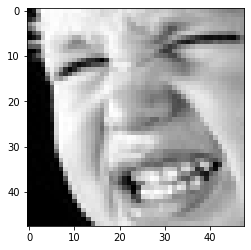

IndexError: list index out of range

In [160]:
plt.imshow(dt[0])
plt.show()
print(tr_dt[0])

In [187]:
kaggle competitions download -c bda-2020-facial-expressions

SyntaxError: invalid syntax (Temp/ipykernel_38068/2279165723.py, line 1)